In [1]:
# import stuff
%load_ext autoreload
%autoreload 2
%matplotlib inline

from random import randint

import numpy as np
import torch

## Load model

In [2]:
from models import InferSent
MODEL_PATH =  '../new_models/infersent1.pkl'
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': 1}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

In [3]:
W2V_PATH = '../dataset/GloVe/glove.840B.300d.txt'
model.set_w2v_path(W2V_PATH)

In [4]:
model.build_vocab_k_words(K=100000)

Vocab size : 100000


## Load sentences

In [5]:
# Load some sentences
sentences = []
with open('samples.txt') as f:
    for line in f:
        sentences.append(line.strip())
print(len(sentences))

9815


In [6]:
sentences[:5]

['Everyone really likes the newest benefits',
 'The Government Executive articles housed on the website are not able to be searched .',
 'I like him for the most part , but would still enjoy seeing someone beat him .',
 'My favorite restaurants are always at least a hundred miles away from my house .',
 'I know exactly .']

## Encode sentences

In [7]:
# gpu mode : ~1000 sentences/s
# cpu mode : ~75 sentences/s

In [8]:
embeddings = model.encode(sentences, bsize=128, tokenize=False, verbose=True)
print('nb sentences encoded : {0}'.format(len(embeddings)))

Nb words kept : 128201/130068 (98.6%)
Speed : 105.9 sentences/s (cpu mode, bsize=128)
nb sentences encoded : 9815


## Visualization

In [9]:
np.linalg.norm(model.encode(['the cat eats.']))

3.5349097

In [10]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [11]:
cosine(model.encode(['the cat eats.'])[0], model.encode(['the cat drinks.'])[0])

0.81652391

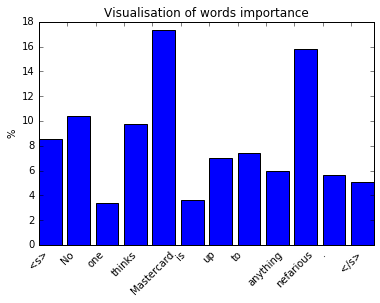

In [15]:
idx = randint(0, len(sentences))
_, _ = model.visualize(sentences[idx])

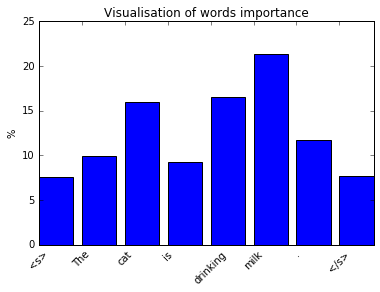

In [16]:
my_sent = 'The cat is drinking milk.'
_, _ = model.visualize(my_sent)

Vocab size : 500000


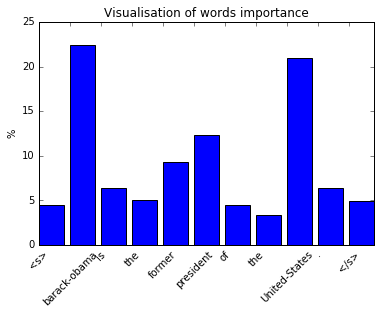

In [17]:
model.build_vocab_k_words(500000) # getting 500K words vocab
my_sent = 'barack-obama is the former president of the United-States.'
_, _ = model.visualize(my_sent)